# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"

    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response.raise_for_status()  # Raise an exception for HTTP errors
        city_weather = response.json()

        # Parse out the needed data using the .get() method for robustness
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lon = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lon,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date,
        })
 
    # If an error is experienced, skip the city
    except Exception as e:  # Catch all exceptions for a simple error message
        print(f"City not found or error occurred. Skipping... ({city}) Error: {e}")
        pass

    # Introduce a delay of 1 second between requests (adjust as needed)
    time.sleep(1)


# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | tatsunocho-tominaga
Processing Record 4 of Set 1 | as sulayyil
Processing Record 5 of Set 1 | petropavlovsk-kamchatsky
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | zhanibek
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | yanam
Processing Record 10 of Set 1 | palembang
Processing Record 11 of Set 1 | uturoa
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | udachny
Processing Record 14 of Set 1 | san luis
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | zelenoborskiy
Processing Record 17 of Set 1 | maumere
Processing Record 18 of Set 1 | oamaru
Processing Record 19 of Set 1 | gutao
Processing Record 20 of Set 1 | frontera
Processing Record 21 of Set 1 | mondlo
Processing Record 22 of Set 1 | aasiaat
Proce

In [12]:
# Convert the list of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show record count for each column
print("Record count for each column:")
print(city_data_df.count())


Record count for each column:
City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64


In [4]:
# Convert the list of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show record count for each column
print("Record count for each column:")
print(city_data_df.count())


City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,codrington,-38.2667,141.9667,53.20,61,100,6.46,AU,1717885947
1,adamstown,-25.0660,-130.1015,72.88,79,40,14.38,PN,1717885929
2,tatsunocho-tominaga,34.8667,134.5500,68.07,89,100,8.23,JP,1717886035
3,as sulayyil,20.4607,45.5779,95.25,10,13,5.95,SA,1717886036
4,petropavlovsk-kamchatsky,53.0452,158.6483,54.19,63,75,14.00,RU,1717886037


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,53.20,61,100,6.46,AU,1717885947
1,adamstown,-25.0660,-130.1015,72.88,79,40,14.38,PN,1717885929
2,tatsunocho-tominaga,34.8667,134.5500,68.07,89,100,8.23,JP,1717886035
3,as sulayyil,20.4607,45.5779,95.25,10,13,5.95,SA,1717886036
4,petropavlovsk-kamchatsky,53.0452,158.6483,54.19,63,75,14.00,RU,1717886037


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

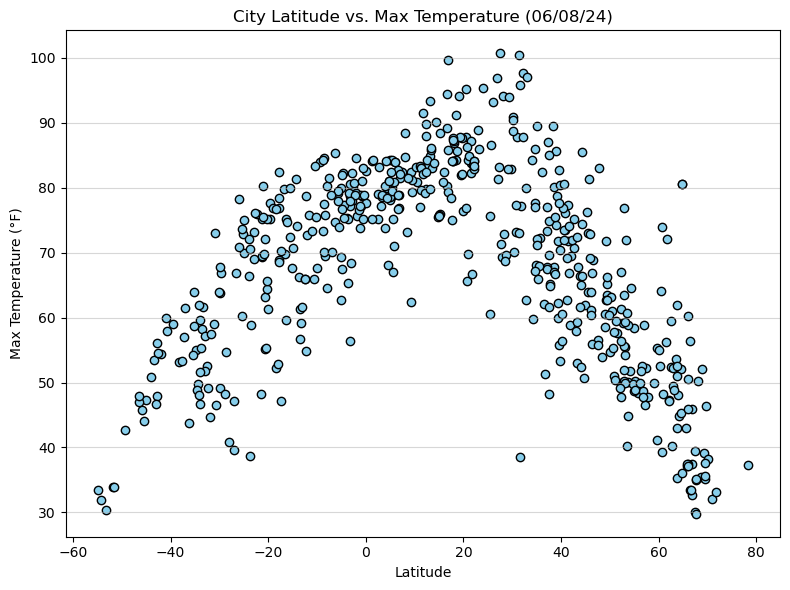

In [18]:
# Extract relevant data from the DataFrame
latitudes = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]

# Build the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
plt.scatter(latitudes, max_temps, marker="o", facecolors="skyblue", edgecolors="black")

# Incorporate other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(axis="y", alpha=0.5)  # Add a subtle horizontal grid for better visual reference

# Tighten layout to prevent labels from overlapping
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

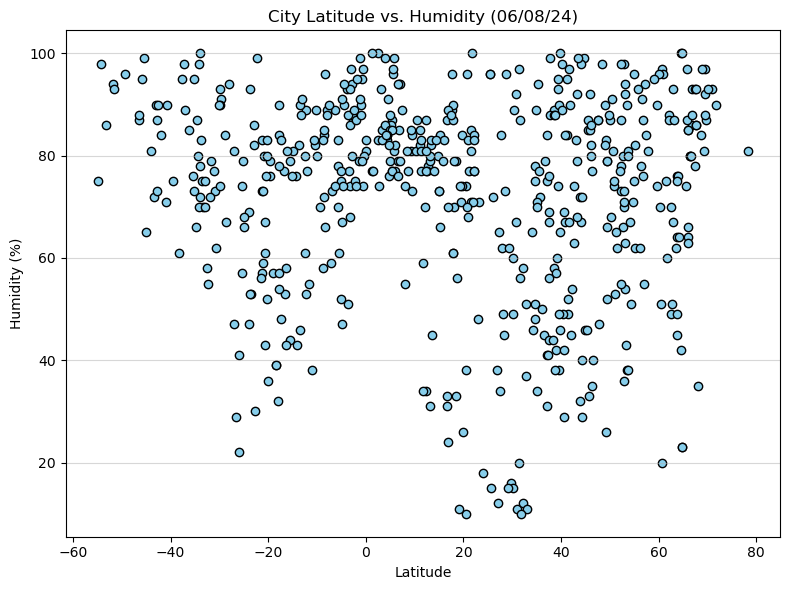

In [19]:
# Extract relevant data
latitudes = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

# Build the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(latitudes, humidity, marker="o", facecolors="skyblue", edgecolors="black")

# Incorporate graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(axis="y", alpha=0.5)  # Optional: Add a subtle grid for easier reading

# Tighten layout (optional)
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

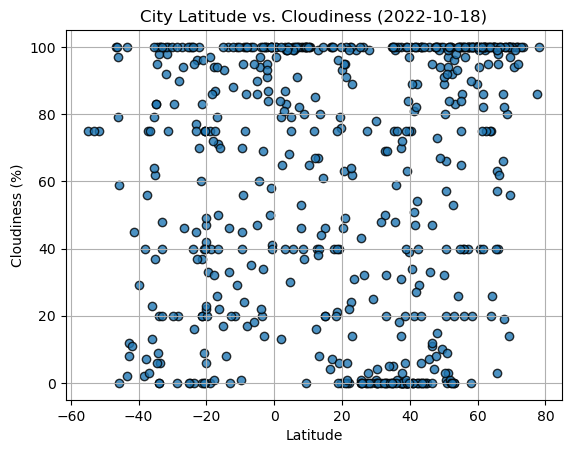

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

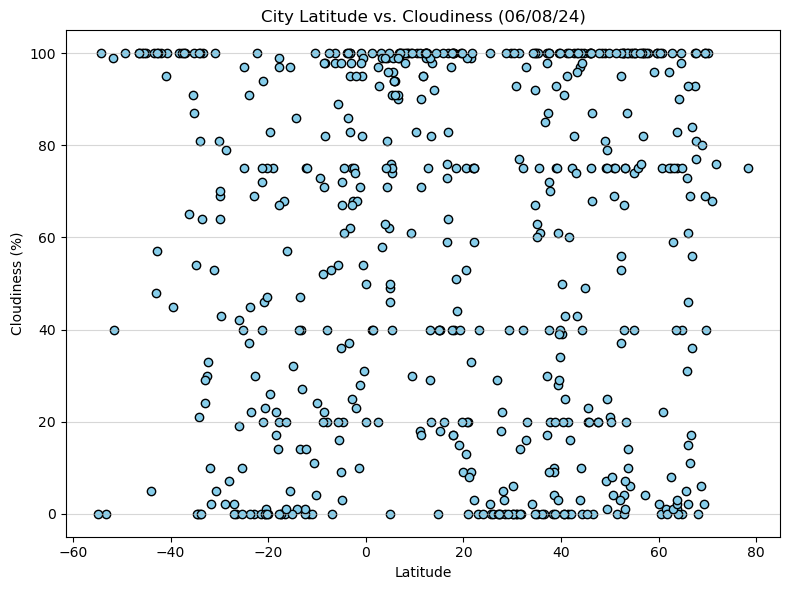

In [21]:
# Extract relevant data
latitudes = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

# Build the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(latitudes, cloudiness, marker="o", facecolors="skyblue", edgecolors="black")

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(axis="y", alpha=0.5)  # Add a subtle horizontal grid

# Tighten layout (optional)
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
def plot_linear_regression(x_values, y_values, x_label, y_label):
    """
    Creates a scatter plot with linear regression line, dynamically placing the regression equation.

    Args:
        x_values (pandas Series): Values for the x-axis.
        y_values (pandas Series): Values for the y-axis.
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
    """

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # Dynamically determine best annotation position
    x_range = x_values.max() - x_values.min()
    y_range = y_values.max() - y_values.min()
    text_x = x_values.min() + 0.1 * x_range
    text_y = y_values.max() - 0.1 * y_range

    plt.annotate(line_eq, (text_x, text_y), fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

    # Print r square value
    print(f"R squared: {rvalue**2}")


In [28]:
# Create Northern Hemisphere DataFrame
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data (first 5 rows)
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tatsunocho-tominaga,34.8667,134.5500,68.07,89,100,8.23,JP,1717886035
3,as sulayyil,20.4607,45.5779,95.25,10,13,5.95,SA,1717886036
4,petropavlovsk-kamchatsky,53.0452,158.6483,54.19,63,75,14.00,RU,1717886037
6,zhanibek,49.4167,46.8500,65.10,79,1,7.16,KZ,1717886040
8,yanam,16.7333,82.2167,80.20,87,59,2.44,IN,1717886042


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [29]:
# Create Southern Hemisphere DataFrame
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data (first 5 rows)
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,53.20,61,100,6.46,AU,1717885947
1,adamstown,-25.0660,-130.1015,72.88,79,40,14.38,PN,1717885929
5,puerto natales,-51.7236,-72.4875,33.96,94,99,5.55,CL,1717885927
7,waitangi,-43.9535,-176.5597,50.83,81,5,7.00,NZ,1717885927
9,palembang,-2.9167,104.7458,78.89,94,75,2.30,ID,1717886044


###  Temperature vs. Latitude Linear Regression Plot

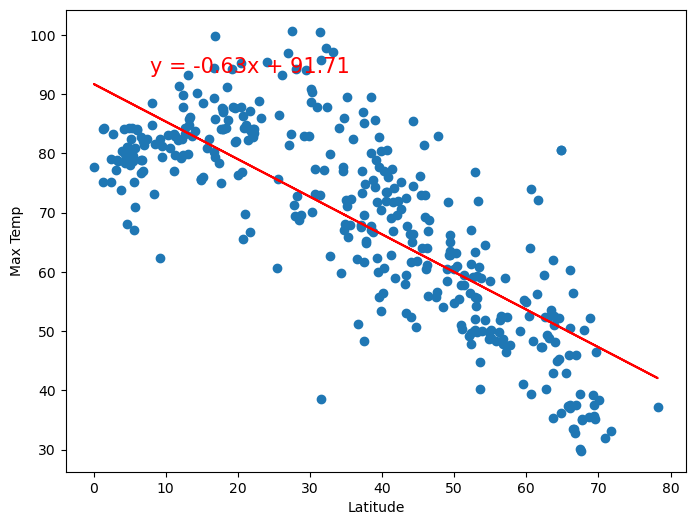

R squared: 0.616738060366076


In [32]:
# Linear regression on Northern Hemisphere for Latitude vs. Max Temp
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"], 
    "Latitude", 
    "Max Temp"
)


The r-value is: 0.7161472181434118


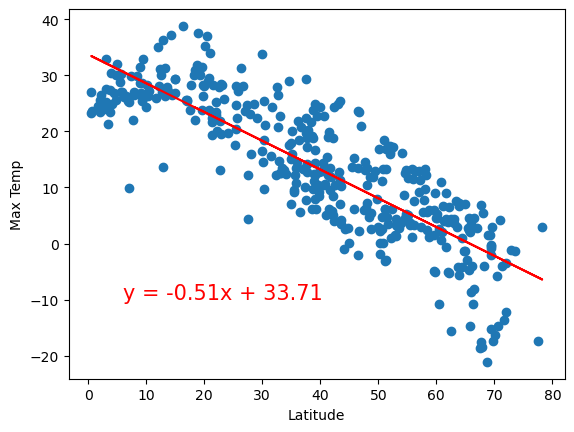

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

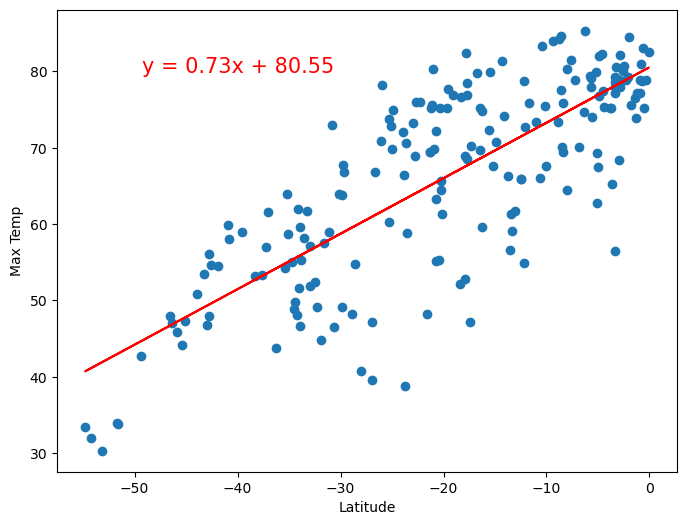

R squared: 0.6213748628627995


In [33]:
# Linear regression on Northern Hemisphere for Latitude vs. Max Temp
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"], 
    "Latitude", 
    "Max Temp"
)


### Humidity vs. Latitude Linear Regression Plot

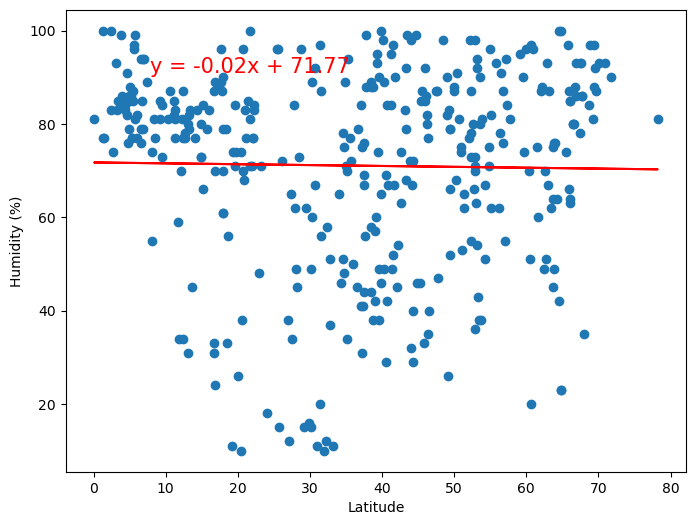

R squared: 0.0003083528050683964


In [34]:
# Linear regression on Northern Hemisphere for Latitude vs. Humidity
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"], 
    "Latitude", 
    "Humidity (%)"  
)


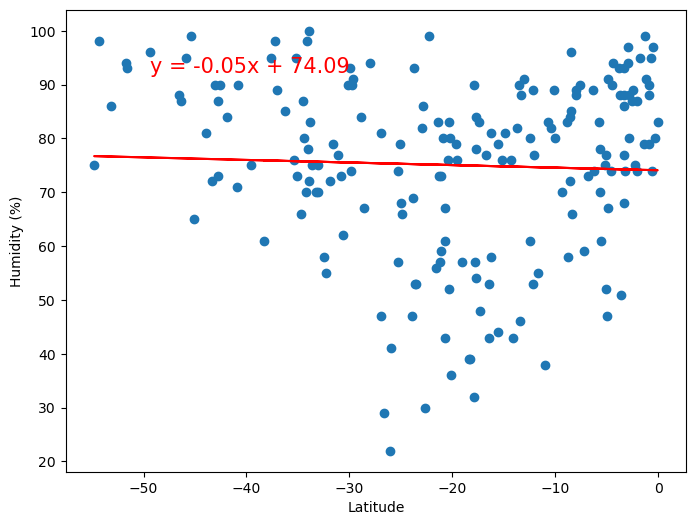

R squared: 0.0016396617709032296


In [38]:
# Linear regression on Southern Hemisphere for Latitude vs. Humidity
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"], 
    "Latitude", 
    "Humidity (%)"  
)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

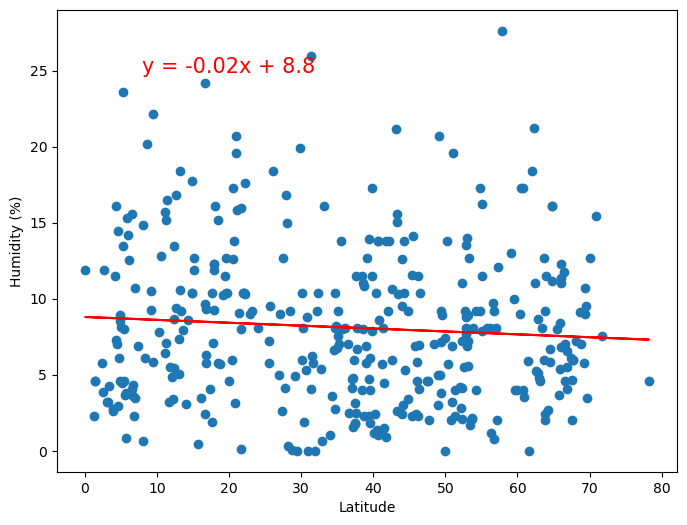

R squared: 0.0056203082605483755


In [45]:
# Linear regression on Northern Hemisphere for Latitude vs. Cloudiness
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    "Latitude", 
    "Humidity (%)"  
)


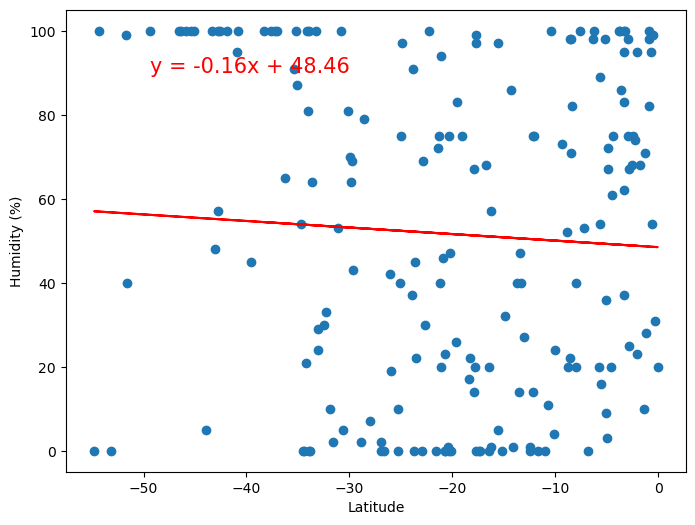

R squared: 0.0034202945454762618


In [44]:
# Linear regression on Northern Hemisphere for Latitude vs. Cloudiness
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Cloudiness"], 
    "Latitude", 
    "Humidity (%)"  
)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

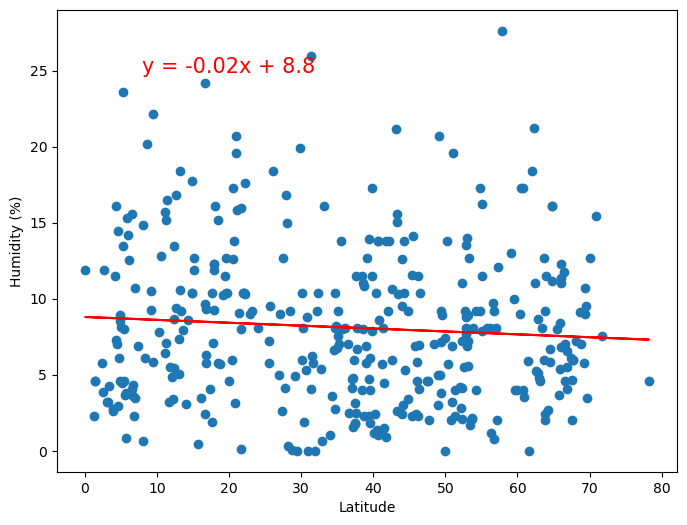

R squared: 0.0056203082605483755


In [43]:
# Linear regression on Northern Hemisphere for Latitude vs. Wind Speed
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    "Latitude", 
    "Humidity (%)"  
)


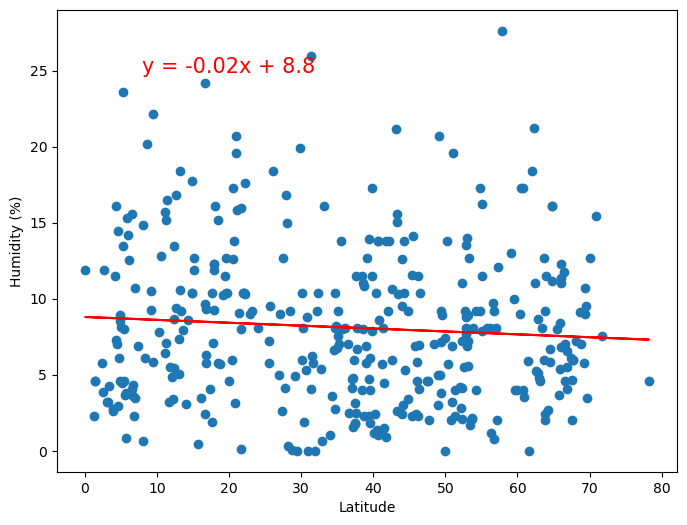

R squared: 0.0056203082605483755


In [42]:
# Linear regression on Southern Hemisphere for Latitude vs. Wind Speed
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    "Latitude", 
    "Humidity (%)"  
)


**Discussion about the linear relationship:** YOUR RESPONSE HERE